# Kalman Filter Simulation

## Defining Kalman Filter

#### The main source for this attempt will be the paper: "A Monte-Carlo Performance Analysis of Kalman Filter and Targeting Algorithms for Autonomous Orbital Rendezvous" by Andrew Thomas Vaughan, submitted to MIT in 2004. Note, a youtube video explaining how to create the code in Python was found, with a github page to be used. However, to keep this project original, a attempt at creating our own KF will be made, although the youtube video may have inspired some of these approaches. 
youtube video: https://www.youtube.com/watch?v=m5Bw1m8jJuY&list=PLvKAPIGzFEr8n7WRx8RptZmC1rXeTzYtA&index=3&ab_channel=CppMonk

#### Variable/Parameters to be defined:

| Variable/Paraeter | Description |
| :-: | :-- |
| $x$ | True state vector |
| $\hat{x}$ | Estimated state vector |
| $\tilde{x}$ | State error vector |
| $x^*$ | Nominal state vector |
| $\delta x$| Perturbation of state vector |
| $\hat{\delta x}$ | Estimated perturbed state |
| $z$ | True measurement vector |
| $\hat{z}$ | Estimated measurement vector |
| $\Phi$ | State transition matrix |
| $\omega$ | Process noise vector |
| $v$ | Measurement noise vector |
| $H$ | Measurement sensitivity matrix |
| $Q$ | Process noise covariance matrix |
| $R$ | Measurement noise covariance matrix |
| $P$ | Error covariance matrix |
| $K$ | Kalman gain (optimal gain) matrix |

#### Equations to be used in KF class:

$
\hat{x}_{i+1} = \textbf{g}(\hat{\textbf{x}}_i, t_i, \Delta t) \\
\textbf{g}(\textbf{x}_i, t_i, \Delta t) = \Phi_{i+1},
$

Prediction step:


Update step:


https://www.kalmanfilter.net/kalman1d.html

Creating the KF class

In [327]:
# equations based on https://www.kalmanfilter.net/kalman1d.html
class KF_1D_runner:
    def __init__(self, measurements, p_0, sigma, variance_estimate, delta_t):
        # list with measurements
        self.measurements = measurements
        # 
        self.x_0 = self.measurements[0]
        self.x = [self.x_0]
        self.predictions = []
        # Variance list
        self.state_variance = p_0
        self.p = [p_0]
        self.variance = variance_estimate
        # Kalman gain list
        kg_0 = p_0/(p_0 + variance_estimate)
        self.kg = [kg_0]
        # Delta T
        self.delta_t = delta_t
        # assumming velocity variance is constant
        self.p_velocity = 1
        # number of steps
        self.number_of_steps = len(self.measurements)
    
    # update
    def k_n(self, n):
        #Kalman gain equation
        new_gain = self.p[n]/(self.p[n] + self.variance)
        self.kg.append(new_gain)
        #return new_gain
        
    def state_update(self, k):
        value = self.x[k] + self.kg[k] * (self.measurements[k] - self.x[k])
        self.x.append(value)
        
    def covariance_update(self, k):
        value = (1-self.kg[k])*self.p[k]
        self.p.append(value)
        
    # predict 
    def predictor(self, k):
        # Not sure on how to define velocity
        if k == 0:
            value = 0
        else:
            value = self.x[k] + self.delta_t*(1)
        self.predictions.append(value)
    
    # run model
    def iterations(self):
        n = self.number_of_steps
        for n in range(n):
            self.k_n(n)
            self.state_update(n)
            self.covariance_update(n)
            self.predictor(n)

    #    value = p[k] + self.delta_t**2 * self.p_velocity

testing:

In [328]:
a = Runner(0,30,1)
print(a.measured_position(0), a.measured_position(0))

1.967541613279893 1.7054407453305975


In [329]:
a = Runner(0,30,1)
b = a.measured_path()
test = KF_1D_runner(b, 1, 1,1,1)
for n in range(30):
    test.k_n(n)
    test.state_update(n)
    test.covariance_update(n)
    test.predictor(n)

print(b[0], test.x_0)

-0.5576961065762854 -0.5576961065762854


### Creating position random experiment  1D

In [330]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Runner:
    def __init__(self, starting_position, steps, sigma):
        self.starting_position = starting_position
        #self.stamina = stamina
        self.steps = steps
        self.step = [n for n in range(steps)]
        self.start_position = starting_position
        self.sigma = sigma
        self.seed = random.randint(1,100)
        
    def noise(self):
        noise = np.random.normal(0, self.sigma, 1)
        noise = noise[0]
        return noise
    
    def real_path(self):
        random.seed(self.seed)
        list1 = [self.starting_position]
        for n in range(self.steps):
            value = list1[n] + random.random()
            list1.append(value)
        return list1
    
    def measured_path(self):
        random.seed(self.seed)
        list_measured = self.real_path()
        for n in range(self.steps):
            list_measured[n] += self.noise()
        return list_measured
    
    def real_position(self, step):
        return self.real_path()[step]
    
    def measured_position(self, step):
        return self.measured_path()[step]
    
    def graph(self):
        random.seed(self.seed)
        return (plt.plot(self.real_path(), label="Real")
                + plt.plot(self.measured_path(), label="Measured"),
                plt.legend(loc="upper left"))


31

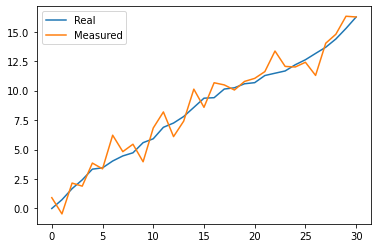

In [335]:
a = Runner(0,30,1)
#print(a.real_position(4), a.measured_position(4))
#print(a.real_path(), "\n", a.measured_path())
a.graph()
len(a.real_path())

# test = KF(initial_x = 0, initial_v = a.position(1), accel_variance=0.1)

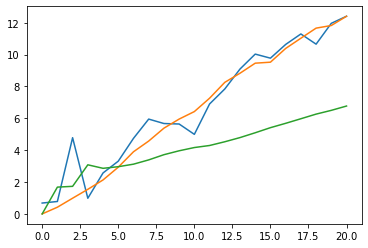

In [333]:
n=20
a = Runner(0,n,1)
b, c = a.measured_path(), a.real_path()
kfilter = KF_1D_runner(b, 1, 1,1,1)

#running model
for n in range(n+1):
    kfilter.k_n(n)
    kfilter.state_update(n)
    kfilter.covariance_update(n)
    kfilter.predictor(n)

#Plotting it
plt.plot(b)
plt.plot(c)
plt.plot(kfilter.predictions, label = "filter")

#### Hidden Markov chain (ignore):

In [131]:
import numpy as np
import matplotlib.pyplot as plt 
import PyDTMC

P = np.eye(4)
mc = MarkovChain(P, ["X_0", "X_1", "X_2", "X_3"])
mc.draw()

ModuleNotFoundError: No module named 'PyDTMC'

SyntaxError: invalid syntax (<ipython-input-2-1f2f60f8bdc2>, line 1)